# Libraries Importation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as st
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SelectFromModel
import datetime as dt

# High Data

###Read data

In [5]:
df = pd.read_csv("/content/drive/MyDrive/data analytics/final/high.csv")
df

,TRADE_DATE,SEC_CODE,SYMBOL1,MARKET,VOLUME,TRADE_QTY,NO_OF_TRADES,HIGH,BEST_ASK_PRICE,BEST_ASK_QTY,BEST_BID_PRICE,BEST_BID_QTY
0,01/02/2022,111001,JOIB,1,199083.73,54378,73,3.67,2.65,585.0,3.13,2000.0
1,01/02/2022,111002,JOKB,1,12707.76,9009,17,1.42,1.36,493.0,1.86,1570.0
2,01/02/2022,111003,JCBK,2,727.41,726,7,1.03,1.14,1853.0,1.64,1000.0
3,01/02/2022,111004,THBK,1,1558.10,394,5,3.97,1.09,660.0,1.59,46.0
4,01/02/2022,111006,SIBK,1,29030.98,14867,11,1.98,1.23,1000.0,1.73,333.0
...,...,...,...,...,...,...,...,...,...,...,...,...
28007,31/10/2022,141214,ASAS,2,1025509.50,1981726,25,0.52,1.55,2462.0,2.04,0.0
28008,31/10/2022,141215,UCIC,2,154.70,455,2,0.34,1.02,6959.0,1.52,14710.0
28009,31/10/2022,141223,SHBA,2,57426.99,10276,14,5.61,1.29,70.0,1.79,0.0
28010,31/10/2022,141224,NCCO,1,1135.00,500,1,2.27,1.00,500.0,1.50,500.0


In [6]:
df.head()

,TRADE_DATE,SEC_CODE,SYMBOL1,MARKET,VOLUME,TRADE_QTY,NO_OF_TRADES,HIGH,BEST_ASK_PRICE,BEST_ASK_QTY,BEST_BID_PRICE,BEST_BID_QTY
0,01/02/2022,111001,JOIB,1,199083.73,54378,73,3.67,2.65,585.0,3.13,2000.0
1,01/02/2022,111002,JOKB,1,12707.76,9009,17,1.42,1.36,493.0,1.86,1570.0
2,01/02/2022,111003,JCBK,2,727.41,726,7,1.03,1.14,1853.0,1.64,1000.0
3,01/02/2022,111004,THBK,1,1558.10,394,5,3.97,1.09,660.0,1.59,46.0
4,01/02/2022,111006,SIBK,1,29030.98,14867,11,1.98,1.23,1000.0,1.73,333.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28012 entries, 0 to 28011
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TRADE_DATE      28012 non-null  object 
 1   SEC_CODE        28012 non-null  int64  
 2   SYMBOL1         28012 non-null  object 
 3   MARKET          28012 non-null  int64  
 4   VOLUME          28012 non-null  float64
 5   TRADE_QTY       28012 non-null  int64  
 6   NO_OF_TRADES    28012 non-null  int64  
 7   HIGH            28012 non-null  float64
 8   BEST_ASK_PRICE  28012 non-null  float64
 9   BEST_ASK_QTY    28012 non-null  float64
 10  BEST_BID_PRICE  28012 non-null  float64
 11  BEST_BID_QTY    28012 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 2.6+ MB


In [8]:
df.describe()

,SEC_CODE,MARKET,VOLUME,TRADE_QTY,NO_OF_TRADES,HIGH,BEST_ASK_PRICE,BEST_ASK_QTY,BEST_BID_PRICE,BEST_BID_QTY
count,28012.000000,28012.000000,2.801200e+04,2.801200e+04,28012.000000,28012.000000,28012.000000,2.801200e+04,28012.000000,2.801200e+04
mean,131287.967871,1.385906,6.312677e+04,4.270346e+04,28.061545,1.713816,1.620775,1.979999e+04,2.113421,2.452341e+04
std,9043.995400,0.750480,3.022558e+05,1.451785e+05,66.231007,4.667872,1.520599,6.742718e+04,1.500857,1.008184e+05
min,111001.000000,0.000000,2.000000e-02,1.000000e+00,1.000000,0.020000,1.000000,0.000000e+00,1.500000,0.000000e+00
25%,131052.000000,1.000000,6.398300e+02,1.000000e+03,3.000000,0.380000,1.050000,5.000000e+02,1.550000,4.000000e+02
50%,131243.000000,2.000000,3.831125e+03,5.873500e+03,9.000000,0.710000,1.180000,2.100000e+03,1.680000,1.912000e+03
75%,141014.000000,2.000000,2.014495e+04,2.843675e+04,25.000000,1.460000,1.550000,9.494250e+03,2.040000,1.038675e+04
max,142041.000000,2.000000,8.868824e+06,5.741963e+06,1700.000000,44.500000,40.000000,1.017951e+06,40.000000,3.600734e+06


In [10]:
df['TRADE_DATE'] = pd.to_datetime(df['TRADE_DATE'], format = '%d/%m/%Y')
df['date'] = df['TRADE_DATE'].dt.month

In [11]:
df.isnull().sum()

,0
TRADE_DATE,0
SEC_CODE,0
SYMBOL1,0
MARKET,0
VOLUME,0
TRADE_QTY,0
NO_OF_TRADES,0
HIGH,0
BEST_ASK_PRICE,0
BEST_ASK_QTY,0


###Insights

calculate some analysis for the data

In [ ]:
df["MARKET"].median()

2.0

In [ ]:
print("The mode of volume is" , (st.mode(df["VOLUME"])))
print("The max of volume is"  , (df['VOLUME'].max()))
print("The min of volume is"  , (df['VOLUME'].min()))
print("The sum of volume is" , df['VOLUME'].sum())


The mode of volume is 12.0
The max of volume is 8868824.37
The min of volume is 0.02
The sum of volume is 1768306984.28


In [ ]:
quartiles = df['TRADE_QTY'].quantile([0.25, 0.5, 0.75])
print("25th Quartile: ", quartiles[0.25])
print("50th Quartile: ", quartiles[0.5])
print("75th Quartile: ", quartiles[0.75])

print("The mean of trades is" , df['TRADE_QTY'].mean())

25th Quartile:  1000.0
50th Quartile:  5873.5
75th Quartile:  28436.75
The mean of trades is 42703.4618734828


In [ ]:
print("The mode of MARKET is" , st.mode(df["MARKET"]))
complaints_by_issue = df.groupby('MARKET').size().reset_index(name='frequency')
complaints_by_issue

The mode of MARKET is 2


,MARKET,frequency
0,0,4569
1,1,8064
2,2,15379


# Low Data

In [ ]:
df0 = pd.read_csv("/content/drive/MyDrive/data analytics/final/low.csv")

In [ ]:
df0.head()

,TRADE_DATE,SEC_CODE,SYMBOL1,MARKET,VOLUME,TRADE_QTY,NO_OF_TRADES,LOW,BEST_ASK_PRICE,BEST_ASK_QTY,BEST_BID_PRICE,BEST_BID_QTY
0,01/02/2022,111001,JOIB,1,199083.73,54378,73,3.65,2.65,585.0,3.13,2000.0
1,01/02/2022,111002,JOKB,1,12707.76,9009,17,1.41,1.36,493.0,1.86,1570.0
2,01/02/2022,111003,JCBK,2,727.41,726,7,1.00,1.14,1853.0,1.64,1000.0
3,01/02/2022,111004,THBK,1,1558.10,394,5,3.95,1.09,660.0,1.59,46.0
4,01/02/2022,111006,SIBK,1,29030.98,14867,11,1.95,1.23,1000.0,1.73,333.0


In [ ]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28012 entries, 0 to 28011
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TRADE_DATE      28012 non-null  object 
 1   SEC_CODE        28012 non-null  int64  
 2   SYMBOL1         28012 non-null  object 
 3   MARKET          28012 non-null  int64  
 4   VOLUME          28012 non-null  float64
 5   TRADE_QTY       28012 non-null  int64  
 6   NO_OF_TRADES    28012 non-null  int64  
 7   LOW             28012 non-null  float64
 8   BEST_ASK_PRICE  28012 non-null  float64
 9   BEST_ASK_QTY    28012 non-null  float64
 10  BEST_BID_PRICE  28012 non-null  float64
 11  BEST_BID_QTY    28012 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 2.6+ MB


In [ ]:
df0.describe()

,SEC_CODE,MARKET,VOLUME,TRADE_QTY,NO_OF_TRADES,LOW,BEST_ASK_PRICE,BEST_ASK_QTY,BEST_BID_PRICE,BEST_BID_QTY
count,28012.000000,28012.000000,2.801200e+04,2.801200e+04,28012.000000,28012.000000,28012.000000,2.801200e+04,28012.000000,2.801200e+04
mean,131287.967871,1.385906,6.312677e+04,4.270346e+04,28.061545,1.680022,1.620775,1.979999e+04,2.113421,2.452341e+04
std,9043.995400,0.750480,3.022558e+05,1.451785e+05,66.231007,4.580905,1.520599,6.742718e+04,1.500857,1.008184e+05
min,111001.000000,0.000000,2.000000e-02,1.000000e+00,1.000000,0.010000,1.000000,0.000000e+00,1.500000,0.000000e+00
25%,131052.000000,1.000000,6.398300e+02,1.000000e+03,3.000000,0.370000,1.050000,5.000000e+02,1.550000,4.000000e+02
50%,131243.000000,2.000000,3.831125e+03,5.873500e+03,9.000000,0.690000,1.180000,2.100000e+03,1.680000,1.912000e+03
75%,141014.000000,2.000000,2.014495e+04,2.843675e+04,25.000000,1.432500,1.550000,9.494250e+03,2.040000,1.038675e+04
max,142041.000000,2.000000,8.868824e+06,5.741963e+06,1700.000000,44.040000,40.000000,1.017951e+06,40.000000,3.600734e+06


In [ ]:
df0.corr()

<ipython-input-56-a6649e8b8fae>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df0.corr()


,SEC_CODE,MARKET,VOLUME,TRADE_QTY,NO_OF_TRADES,LOW,BEST_ASK_PRICE,BEST_ASK_QTY,BEST_BID_PRICE,BEST_BID_QTY
SEC_CODE,1.000000,0.113634,0.029074,0.001203,0.080537,0.087945,0.080564,0.013348,0.080564,0.009386
MARKET,0.113634,1.000000,-0.034048,0.045583,0.001102,-0.089948,0.001116,-0.099576,0.001093,-0.089226
VOLUME,0.029074,-0.034048,1.000000,0.620277,0.777427,0.304766,0.777378,-0.026209,0.777434,-0.011380
TRADE_QTY,0.001203,0.045583,0.620277,1.000000,0.449219,-0.014457,0.449198,0.080231,0.449170,0.075985
NO_OF_TRADES,0.080537,0.001102,0.777427,0.449219,1.000000,0.283693,0.999997,-0.020228,0.999998,0.001323
LOW,0.087945,-0.089948,0.304766,-0.014457,0.283693,1.000000,0.283831,-0.086282,0.283850,-0.070707
BEST_ASK_PRICE,0.080564,0.001116,0.777378,0.449198,0.999997,0.283831,1.000000,-0.020253,0.999999,0.001313
BEST_ASK_QTY,0.013348,-0.099576,-0.026209,0.080231,-0.020228,-0.086282,-0.020253,1.000000,-0.020260,0.271098
BEST_BID_PRICE,0.080564,0.001093,0.777434,0.449170,0.999998,0.283850,0.999999,-0.020260,1.000000,0.001308
BEST_BID_QTY,0.009386,-0.089226,-0.011380,0.075985,0.001323,-0.070707,0.001313,0.271098,0.001308,1.000000


In [ ]:
df0.isnull().sum()

TRADE_DATE        0
SEC_CODE          0
SYMBOL1           0
MARKET            0
VOLUME            0
TRADE_QTY         0
NO_OF_TRADES      0
LOW               0
BEST_ASK_PRICE    0
BEST_ASK_QTY      0
BEST_BID_PRICE    0
BEST_BID_QTY      0
dtype: int64

# Visualization

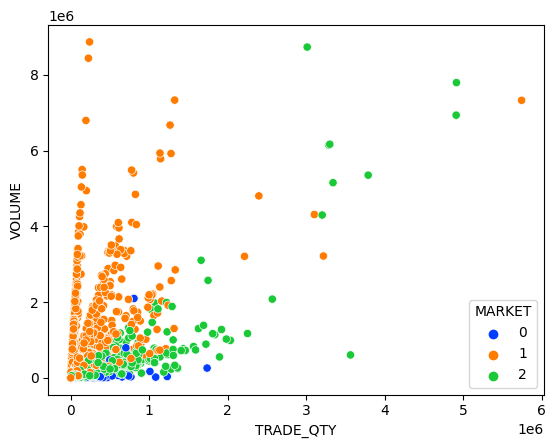

In [ ]:
sns.scatterplot(x = 'TRADE_QTY', y = 'VOLUME', hue = 'MARKET' , palette = 'bright', data = df)
plt.show()

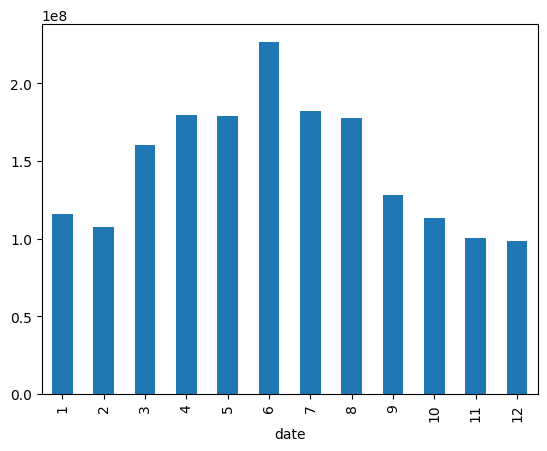

In [ ]:
volume_and_months = df.groupby(['date'])['VOLUME'].sum()
volume_and_months.plot.bar()
plt.show()

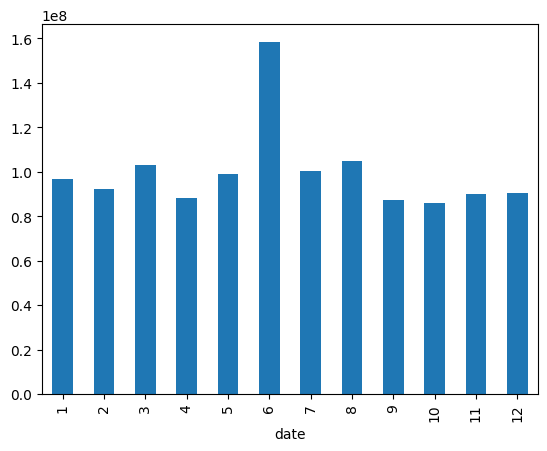

In [ ]:
trade_and_months = df.groupby(['date'])['TRADE_QTY'].sum()
trade_and_months.plot.bar()
plt.show()

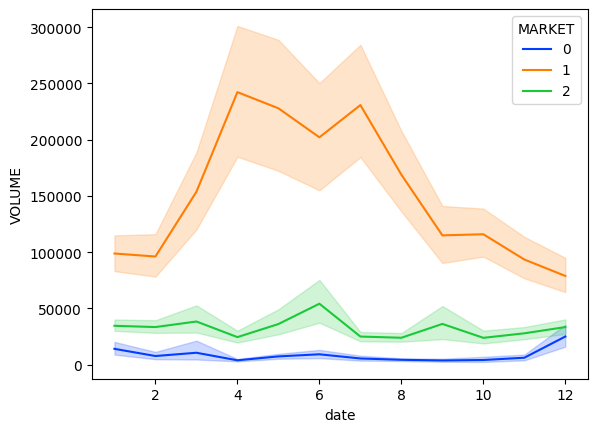

In [ ]:
sns.lineplot(x = 'date' , y = 'VOLUME', hue = 'MARKET',palette="bright", data = df)
plt.show()

<Axes: xlabel='date', ylabel='TRADE_QTY'>

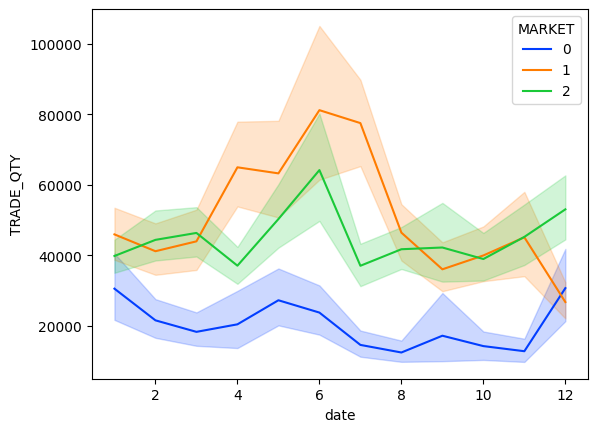

In [ ]:
sns.lineplot(x = 'date' , y = 'TRADE_QTY', hue = 'MARKET', palette="bright", data = df)

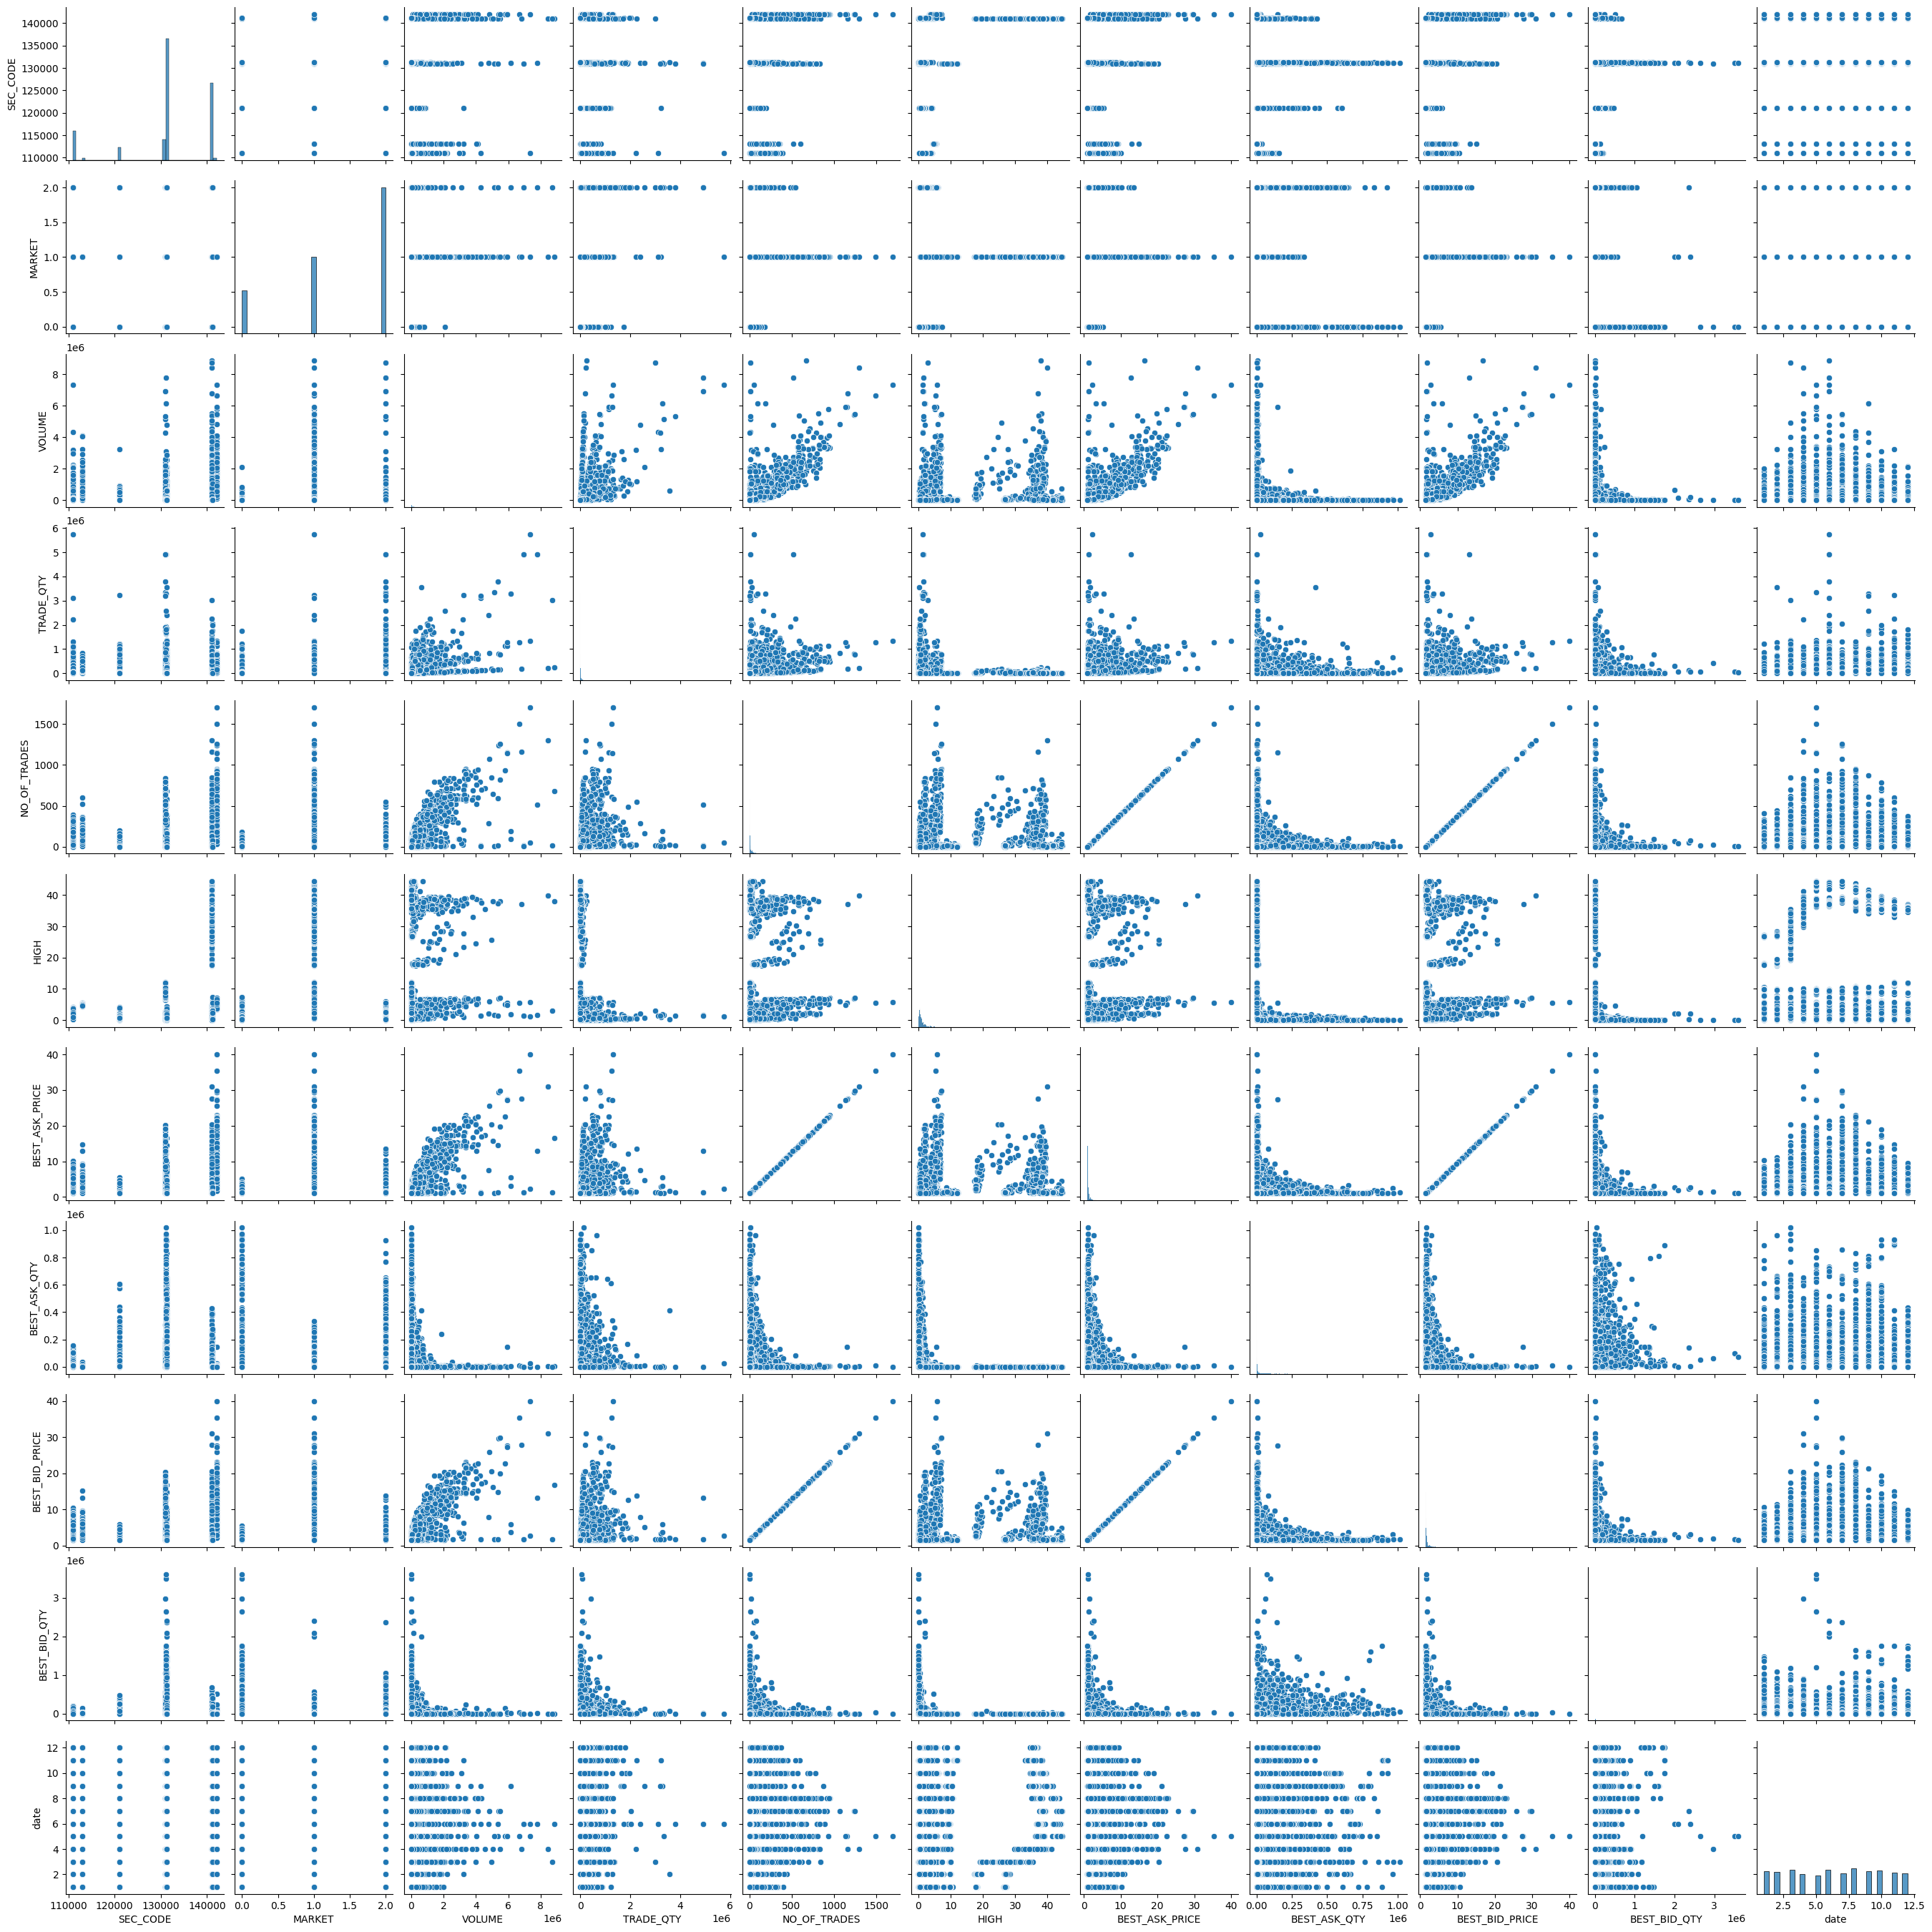

In [ ]:
sns.pairplot(df)
plt.show()

# contingecny table

In [ ]:
table= pd.crosstab(df['MARKET'] , df['date'])
table

date,1,2,3,4,5,6,7,8,9,10,11,12
MARKET,,,,,,,,,,,,
0,379,356,430,322,359,427,341,423,397,437,364,334
1,620,633,657,624,617,730,651,834,682,686,691,639
2,1423,1318,1426,1111,995,1387,1211,1454,1326,1342,1197,1189


#High Models


### skb method

In [ ]:
lb = preprocessing.LabelEncoder()
df['SYMBOL1'] = lb.fit_transform(df['SYMBOL1'])
x = df.drop(['HIGH','TRADE_DATE'], axis=1)
y = df['HIGH']
sc = StandardScaler()
tree = DecisionTreeRegressor(random_state=0)
lr = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=5)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
skbmodel = SelectKBest(f_regression, k=8)

skbmodel.fit(x, y)
x4skb = skbmodel.transform(x)

In [ ]:
maelrskb  = []
mselrskb  = []
rmselrskb = []
r2lrskb   = []

for i in range(30):

    x_train, x_test, y_train, y_test = train_test_split(x4skb, y, test_size=0.2, random_state=i)
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)

    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    mae = mean_absolute_error(y_test , y_pred)
    maelrskb.append(mae)
    mse = mean_squared_error(y_test , y_pred)
    mselrskb.append(mse)
    rmse = mean_squared_error(y_test , y_pred , squared=False)
    rmselrskb.append(rmse)
    r2 = r2_score(y_test , y_pred)
    r2lrskb.append(r2)

maelrskbsum = sum(maelrskb)/len(maelrskb)
mselrskbsum = sum(mselrskb)/len(mselrskb)
rmselrskbsum = sum(rmselrskb)/len(rmselrskb)
r2lrskbsum = sum(r2lrskb)/len(r2lrskb)

print("Features Selected: " , x.columns[skbmodel.get_support()])
print("MAE:" , round(maelrskbsum , 3))
print("MSE:" , round(mselrskbsum , 3))
print("RMSE:" , round(rmselrskbsum , 3))
print("R2:" , round(r2lrskbsum , 3))

Features Selected:  Index(['SEC_CODE', 'SYMBOL1', 'MARKET', 'VOLUME', 'NO_OF_TRADES',
       'BEST_ASK_PRICE', 'BEST_ASK_QTY', 'BEST_BID_PRICE'],
      dtype='object')
MAE: 1.716
MSE: 18.809
RMSE: 4.334
R2: 0.134


In [ ]:
maedtskb  = []
msedtskb  = []
rmsedtskb = []
r2dtskb   = []

for i in range(30):

    x_train, x_test, y_train, y_test = train_test_split(x4skb, y, test_size=0.2, random_state=i)
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)

    tree.fit(x_train, y_train)
    y_pred = tree.predict(x_test)
    mae = mean_absolute_error(y_test , y_pred)
    maedtskb.append(mae)
    mse = mean_squared_error(y_test , y_pred)
    msedtskb.append(mse)
    rmse = mean_squared_error(y_test , y_pred , squared=False)
    rmsedtskb.append(rmse)
    r2 = r2_score(y_test , y_pred)
    r2dtskb.append(r2)

maedtskbsum = sum(maedtskb)/len(maedtskb)
msedtskbsum = sum(msedtskb)/len(msedtskb)
rmsedtskbsum = sum(rmsedtskb)/len(rmsedtskb)
r2dtskbsum = sum(r2dtskb)/len(r2dtskb)

print("Features Selected: " , x.columns[skbmodel.get_support()])
print("MAE:" , round(maedtskbsum , 3))
print("MSE:" , round(msedtskbsum , 3))
print("RMSE:" , round(rmsedtskbsum , 3))
print("R2:" , round(r2dtskbsum , 3))

Features Selected:  Index(['SEC_CODE', 'SYMBOL1', 'MARKET', 'VOLUME', 'NO_OF_TRADES',
       'BEST_ASK_PRICE', 'BEST_ASK_QTY', 'BEST_BID_PRICE'],
      dtype='object')
MAE: 0.257
MSE: 1.851
RMSE: 1.351
R2: 0.915


In [ ]:
maeknnskb  = []
mseknnskb  = []
rmseknnskb = []
r2knnskb   = []

for i in range(30):

    x_train, x_test, y_train, y_test = train_test_split(x4skb, y, test_size=0.2, random_state=i)
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)

    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    mae = mean_absolute_error(y_test , y_pred)
    maeknnskb.append(mae)
    mse = mean_squared_error(y_test , y_pred)
    mseknnskb.append(mse)
    rmse = mean_squared_error(y_test , y_pred , squared=False)
    rmseknnskb.append(rmse)
    r2 = r2_score(y_test , y_pred)
    r2knnskb.append(r2)

maeknnskbsum = sum(maeknnskb)/len(maeknnskb)
mseknnskbsum = sum(mseknnskb)/len(mseknnskb)
rmseknnskbsum = sum(rmseknnskb)/len(rmseknnskb)
r2knnskbsum = sum(r2knnskb)/len(r2knnskb)


print("Features Selected: " , x.columns[skbmodel.get_support()])
print("MAE:" , round(maeknnskbsum , 3))
print("MSE:" , round(mseknnskbsum , 3))
print("RMSE:" , round(rmseknnskbsum , 3))
print("R2:" , round(r2knnskbsum , 3))

Features Selected:  Index(['SEC_CODE', 'SYMBOL1', 'MARKET', 'VOLUME', 'NO_OF_TRADES',
       'BEST_ASK_PRICE', 'BEST_ASK_QTY', 'BEST_BID_PRICE'],
      dtype='object')
MAE: 0.383
MSE: 3.493
RMSE: 1.864
R2: 0.839


### Variance

In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split

r2lrv   = []
mselrv  = []
maelrv  = []
rmselrv = []

variances = x.var()

selector = VarianceThreshold()

selector.fit(x,y)
x4v = selector.transform(x)

selected_indices = selector.get_support(indices=True)

selected_features = [x.columns[i] for i in selected_indices]

for i in range(30):

  X_train, X_test, y_train, y_test = train_test_split(x4v, y, test_size=0.2, random_state=i)
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  lr.fit(X_train, y_train)

  y_pred = lr.predict(X_test)

  MAE = mean_absolute_error(y_test , y_pred)
  maelrv.append(MAE)

  MSE = mean_squared_error(y_test , y_pred)
  mselrv.append(MSE)

  RMSE = mean_squared_error(y_test , y_pred , squared=False)
  rmselrv.append(RMSE)

  R2 = r2_score(y_test , y_pred)
  r2lrv.append(R2)

maelrvsum = sum(maelrv)/len(maelrv)
mselrvsum = sum(mselrv)/len(mselrv)
rmselrvsum = sum(rmselrv)/len(rmselrv)
r2lrvsum = sum(r2lrv)/len(r2lrv)

print("Feature are" , selected_features)
print("MAE:", round(maelrvsum, 3))
print("MSE:", round(mselrvsum, 3))
print("RMSE:", round(rmselrvsum, 3))
print("R²:", round(r2lrvsum, 3))

Feature are ['SEC_CODE', 'SYMBOL1', 'MARKET', 'VOLUME', 'TRADE_QTY', 'NO_OF_TRADES', 'BEST_ASK_PRICE', 'BEST_ASK_QTY', 'BEST_BID_PRICE', 'BEST_BID_QTY', 'date']
MAE: 1.644
MSE: 17.58
RMSE: 4.19
R²: 0.19


In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split

r2dtv   = []
msedtv  = []
maedtv  = []
rmsedtv = []

variances = x.var()

selector = VarianceThreshold()

selector.fit(x,y)
x4v = selector.transform(x)

selected_indices = selector.get_support(indices=True)

selected_features = [x.columns[i] for i in selected_indices]

for i in range(30):

  X_train, X_test, y_train, y_test = train_test_split(x4v, y, test_size=0.2, random_state=i)
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  tree.fit(X_train, y_train)

  y_pred = tree.predict(X_test)

  MAE = mean_absolute_error(y_test , y_pred)
  maedtv.append(MAE)

  MSE = mean_squared_error(y_test , y_pred)
  msedtv.append(MSE)

  RMSE = mean_squared_error(y_test , y_pred , squared=False)
  rmsedtv.append(RMSE)

  R2 = r2_score(y_test , y_pred)
  r2dtv.append(R2)

maedtvsum = sum(maedtv)/len(maedtv)
msedtvsum = sum(msedtv)/len(msedtv)
rmsedtvsum = sum(rmsedtv)/len(rmsedtv)
r2dtvsum = sum(r2dtv)/len(r2dtv)

print("Feature are" , selected_features)
print("MAE:", round(maedtvsum, 3))
print("MSE:", round(msedtvsum, 3))
print("RMSE:", round(rmsedtvsum, 3))
print("R²:", round(r2dtvsum, 3))

Feature are ['SEC_CODE', 'SYMBOL1', 'MARKET', 'VOLUME', 'TRADE_QTY', 'NO_OF_TRADES', 'BEST_ASK_PRICE', 'BEST_ASK_QTY', 'BEST_BID_PRICE', 'BEST_BID_QTY', 'date']
MAE: 0.141
MSE: 0.698
RMSE: 0.821
R²: 0.968


In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split

r2knnv   = []
mseknnv  = []
maeknnv  = []
rmseknnv = []

variances = x.var()

selector = VarianceThreshold()
selector.fit(x,y)
x4v = selector.transform(x)
selected_indices = selector.get_support(indices=True)

selected_features = [x.columns[i] for i in selected_indices]

for i in range(30):

  X_train, X_test, y_train, y_test = train_test_split(x4v, y, test_size=0.2, random_state=i)
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  knn.fit(X_train, y_train)

  y_pred = knn.predict(X_test)

  MAE = mean_absolute_error(y_test , y_pred)
  maeknnv.append(MAE)

  MSE = mean_squared_error(y_test , y_pred)
  mseknnv.append(MSE)

  RMSE = mean_squared_error(y_test , y_pred , squared=False)
  rmseknnv.append(RMSE)

  R2 = r2_score(y_test , y_pred)
  r2knnv.append(R2)

maeknnvsum = sum(maeknnv)/len(maeknnv)
mseknnvsum = sum(mseknnv)/len(mseknnv)
rmseknnvsum = sum(rmseknnv)/len(rmseknnv)
r2knnvsum = sum(r2knnv)/len(r2knnv)

print("Feature are" , selected_features)
print("MAE:", round(maeknnvsum, 3))
print("MSE:", round(mseknnvsum, 3))
print("RMSE:", round(rmseknnvsum, 3))
print("R²:", round(r2knnvsum, 3))

Feature are ['SEC_CODE', 'SYMBOL1', 'MARKET', 'VOLUME', 'TRADE_QTY', 'NO_OF_TRADES', 'BEST_ASK_PRICE', 'BEST_ASK_QTY', 'BEST_BID_PRICE', 'BEST_BID_QTY', 'date']
MAE: 0.251
MSE: 0.925
RMSE: 0.955
R²: 0.957


#Low Models


### skb method

In [ ]:
lb = preprocessing.LabelEncoder()
df0['SYMBOL1'] = lb.fit_transform(df0['SYMBOL1'])
x1 = df0.drop(['LOW','TRADE_DATE'], axis=1)
y1 = df0['LOW']
sc = StandardScaler()
tree = DecisionTreeRegressor(random_state=0)
lr = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=5)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
skbmodel = SelectKBest(f_regression, k=8)

skbmodel.fit(x1, y1)
x4skb = skbmodel.transform(x1)

In [ ]:
maelrskblow  = []
mselrskblow  = []
rmselrskblow = []
r2lrskblow   = []

for i in range(30):

    x_train, x_test, y_train, y_test = train_test_split(x4skb, y1, test_size=0.2, random_state=i)
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)

    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    mae = mean_absolute_error(y_test , y_pred)
    maelrskblow.append(mae)
    mse = mean_squared_error(y_test , y_pred)
    mselrskblow.append(mse)
    rmse = mean_squared_error(y_test , y_pred , squared=False)
    rmselrskblow.append(rmse)
    r2 = r2_score(y_test , y_pred)
    r2lrskblow.append(r2)

maelrskbsumlow = sum(maelrskblow)/len(maelrskblow)
mselrskbsumlow = sum(mselrskblow)/len(mselrskblow)
rmselrskbsumlow = sum(rmselrskblow)/len(rmselrskblow)
r2lrskbsumlow = sum(r2lrskblow)/len(r2lrskblow)
print("Features Selected: ", x1.columns[skbmodel.get_support()])
print("MAE:" , round(maelrskbsumlow , 3))
print("MSE:" , round(mselrskbsumlow , 3))
print("RMSE:" , round(rmselrskbsumlow , 3))
print("R2:" , round(r2lrskbsumlow , 3))

Features Selected:  Index(['SEC_CODE', 'SYMBOL1', 'MARKET', 'VOLUME', 'NO_OF_TRADES',
       'BEST_ASK_PRICE', 'BEST_ASK_QTY', 'BEST_BID_PRICE'],
      dtype='object')
MAE: 1.688
MSE: 18.193
RMSE: 4.263
R2: 0.13


In [ ]:
maedtskblow  = []
msedtskblow  = []
rmsedtskblow = []
r2dtskblow   = []

for i in range(30):

    x_train, x_test, y_train, y_test = train_test_split(x4skb, y1, test_size=0.2, random_state=i)
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)

    tree.fit(x_train, y_train)
    y_pred = tree.predict(x_test)
    mae = mean_absolute_error(y_test , y_pred)
    maedtskblow.append(mae)
    mse = mean_squared_error(y_test , y_pred)
    msedtskblow.append(mse)
    rmse = mean_squared_error(y_test , y_pred , squared=False)
    rmsedtskblow.append(rmse)
    r2 = r2_score(y_test , y_pred)
    r2dtskblow.append(r2)

maedtskbsumlow = sum(maedtskblow)/len(maedtskblow)
msedtskbsumlow = sum(msedtskblow)/len(msedtskblow)
rmsedtskbsumlow = sum(rmsedtskblow)/len(rmsedtskblow)
r2dtskbsumlow = sum(r2dtskblow)/len(r2dtskblow)

print("Features Selected: " , x1.columns[skbmodel.get_support()])
print("MAE:" , round(maedtskbsumlow , 3))
print("MSE:" , round(msedtskbsumlow , 3))
print("RMSE:" , round(rmsedtskbsumlow , 3))
print("R2:" , round(r2dtskbsumlow , 3))

Features Selected:  Index(['SEC_CODE', 'SYMBOL1', 'MARKET', 'VOLUME', 'NO_OF_TRADES',
       'BEST_ASK_PRICE', 'BEST_ASK_QTY', 'BEST_BID_PRICE'],
      dtype='object')
MAE: 0.25
MSE: 1.774
RMSE: 1.32
R2: 0.915


In [ ]:
maeknnskblow  = []
mseknnskblow  = []
rmseknnskblow = []
r2knnskblow   = []

for i in range(30):

    x_train, x_test, y_train, y_test = train_test_split(x4skb, y1, test_size=0.2, random_state=i)
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)

    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    mae = mean_absolute_error(y_test , y_pred)
    maeknnskblow.append(mae)
    mse = mean_squared_error(y_test , y_pred)
    mseknnskblow.append(mse)
    rmse = mean_squared_error(y_test , y_pred , squared=False)
    rmseknnskblow.append(rmse)
    r2 = r2_score(y_test , y_pred)
    r2knnskblow.append(r2)

maeknnskbsumlow = sum(maeknnskblow)/len(maeknnskblow)
mseknnskbsumlow = sum(mseknnskblow)/len(mseknnskblow)
rmseknnskbsumlow = sum(rmseknnskblow)/len(rmseknnskblow)
r2knnskbsumlow = sum(r2knnskblow)/len(r2knnskblow)

print("Features Selected: " , x1.columns[skbmodel.get_support()])
print("MAE:" , round(maeknnskbsumlow , 3))
print("MSE:" , round(mseknnskbsumlow , 3))
print("RMSE:" , round(rmseknnskbsumlow , 3))
print("R2:" , round(r2knnskbsumlow , 3))

Features Selected:  Index(['SEC_CODE', 'SYMBOL1', 'MARKET', 'VOLUME', 'NO_OF_TRADES',
       'BEST_ASK_PRICE', 'BEST_ASK_QTY', 'BEST_BID_PRICE'],
      dtype='object')
MAE: 0.375
MSE: 3.345
RMSE: 1.824
R2: 0.84


### low variance

In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split

r2lrvlow   = []
mselrvlow  = []
maelrvlow  = []
rmselrvlow = []

variances = x1.var()

selector = VarianceThreshold()

selector.fit(x1,y1)
x4v = selector.transform(x1)

selected_indices = selector.get_support(indices=True)

selected_features = [x1.columns[i] for i in selected_indices]

for i in range(30):

  X_train, X_test, y_train, y_test = train_test_split(x4v, y1, test_size=0.2, random_state=i)
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  lr.fit(X_train, y_train)

  y_pred = lr.predict(X_test)

  MAE = mean_absolute_error(y_test , y_pred)
  maelrvlow.append(MAE)

  MSE = mean_squared_error(y_test , y_pred)
  mselrvlow.append(MSE)

  RMSE = mean_squared_error(y_test , y_pred , squared=False)
  rmselrvlow.append(RMSE)

  R2 = r2_score(y_test , y_pred)
  r2lrvlow.append(R2)

maelrvsumlow = sum(maelrvlow)/len(maelrvlow)
mselrvsumlow = sum(mselrvlow)/len(mselrvlow)
rmselrvsumlow = sum(rmselrvlow)/len(rmselrvlow)
r2lrvsumlow = sum(r2lrvlow)/len(r2lrvlow)

print("Feature are" , selected_features)
print("MAE:", round(maelrvsumlow, 3))
print("MSE:", round(mselrvsumlow, 3))
print("RMSE:", round(rmselrvsumlow, 3))
print("R²:", round(r2lrvsumlow, 3))

Feature are ['SEC_CODE', 'SYMBOL1', 'MARKET', 'VOLUME', 'TRADE_QTY', 'NO_OF_TRADES', 'BEST_ASK_PRICE', 'BEST_ASK_QTY', 'BEST_BID_PRICE', 'BEST_BID_QTY']
MAE: 1.615
MSE: 17.04
RMSE: 4.125
R²: 0.185


In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split

r2dtvlow   = []
msedtvlow  = []
maedtvlow  = []
rmsedtvlow = []

variances = x1.var()

selector = VarianceThreshold()

selector.fit(x1,y1)
x4v = selector.transform(x1)

selected_indices = selector.get_support(indices=True)

selected_features = [x1.columns[i] for i in selected_indices]

for i in range(30):

  X_train, X_test, y_train, y_test = train_test_split(x4v, y1, test_size=0.2, random_state=i)
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  tree.fit(X_train, y_train)

  y_pred = tree.predict(X_test)

  MAE = mean_absolute_error(y_test , y_pred)
  maedtvlow.append(MAE)

  MSE = mean_squared_error(y_test , y_pred)
  msedtvlow.append(MSE)

  RMSE = mean_squared_error(y_test , y_pred , squared=False)
  rmsedtvlow.append(RMSE)

  R2 = r2_score(y_test , y_pred)
  r2dtvlow.append(R2)

maedtvsumlow = sum(maedtvlow)/len(maedtvlow)
msedtvsumlow = sum(msedtvlow)/len(msedtvlow)
rmsedtvsumlow = sum(rmsedtvlow)/len(rmsedtvlow)
r2dtvsumlow = sum(r2dtvlow)/len(r2dtvlow)

print("Feature are" , selected_features)
print("MAE:", round(maedtvsumlow, 3))
print("MSE:", round(msedtvsumlow, 3))
print("RMSE:", round(rmsedtvsumlow, 3))
print("R²:", round(r2dtvsumlow, 3))

Feature are ['SEC_CODE', 'SYMBOL1', 'MARKET', 'VOLUME', 'TRADE_QTY', 'NO_OF_TRADES', 'BEST_ASK_PRICE', 'BEST_ASK_QTY', 'BEST_BID_PRICE', 'BEST_BID_QTY']
MAE: 0.219
MSE: 1.326
RMSE: 1.144
R²: 0.936


In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split

r2knnvlow   = []
mseknnvlow  = []
maeknnvlow  = []
rmseknnvlow = []

variances = x1.var()

selector = VarianceThreshold()

selector.fit(x1,y1)
x4v = selector.transform(x1)

selected_indices = selector.get_support(indices=True)

selected_features = [x1.columns[i] for i in selected_indices]

for i in range(30):

  X_train, X_test, y_train, y_test = train_test_split(x4v, y1, test_size=0.2, random_state=i)
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  knn.fit(X_train, y_train)

  y_pred = knn.predict(X_test)

  MAE = mean_absolute_error(y_test , y_pred)
  maeknnvlow.append(MAE)

  MSE = mean_squared_error(y_test , y_pred)
  mseknnvlow.append(MSE)

  RMSE = mean_squared_error(y_test , y_pred , squared=False)
  rmseknnvlow.append(RMSE)

  R2 = r2_score(y_test , y_pred)
  r2knnvlow.append(R2)

maeknnvsumlow = sum(maeknnvlow)/len(maeknnvlow)
mseknnvsumlow = sum(mseknnvlow)/len(mseknnvlow)
rmseknnvsumlow = sum(rmseknnvlow)/len(rmseknnvlow)
r2knnvsumlow = sum(r2knnvlow)/len(r2knnvlow)

print("Feature are" , selected_features)
print("MAE:", round(maeknnvsumlow, 3))
print("MSE:", round(mseknnvsumlow, 3))
print("RMSE:", round(rmseknnvsumlow, 3))
print("R²:", round(r2knnvsumlow, 3))

Feature are ['SEC_CODE', 'SYMBOL1', 'MARKET', 'VOLUME', 'TRADE_QTY', 'NO_OF_TRADES', 'BEST_ASK_PRICE', 'BEST_ASK_QTY', 'BEST_BID_PRICE', 'BEST_BID_QTY']
MAE: 0.241
MSE: 1.12
RMSE: 1.054
R²: 0.946


# Visualization for results

### high

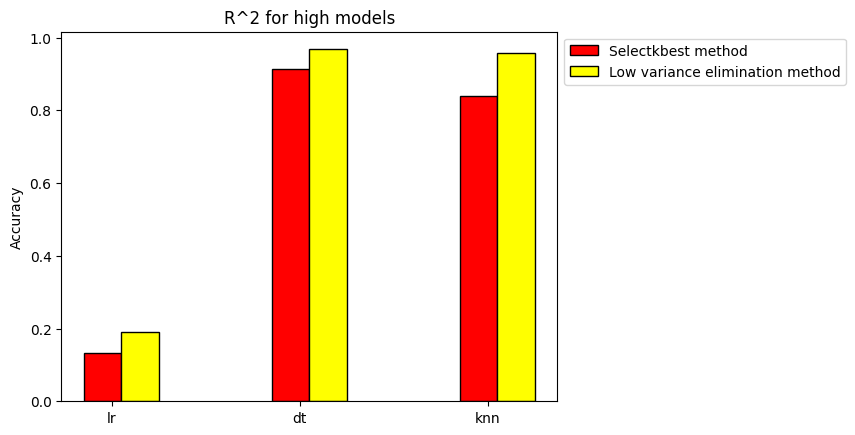

In [ ]:
models = ['lr' , 'dt' , 'knn']
list1h = [r2lrskbsum , r2dtskbsum , r2knnskbsum]
list2h = [r2lrvsum , r2dtvsum , r2knnvsum]
X_axis = np.arange(len(models))
plt.bar(X_axis + 0.15 , list1h  , color = 'Red' ,    width = 0.20 , edgecolor = 'black' , label = 'Selectkbest method')
plt.bar(X_axis + 0.35 , list2h , color = 'Yellow' , width = 0.20 , edgecolor = 'black' , label = 'Low variance elimination method')

plt.xticks(X_axis + 0.20, models)
plt.legend(bbox_to_anchor=(1 , 1))

plt.ylabel("Accuracy")
plt.title("R^2 for high models")
plt.show()

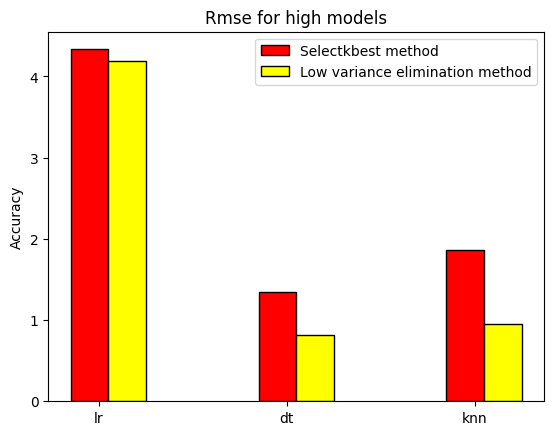

In [ ]:
models = ['lr' , 'dt' , 'knn']
list1h = [rmselrskbsum , rmsedtskbsum , rmseknnskbsum]
list2h = [rmselrvsum , rmsedtvsum , rmseknnvsum]
X_axis = np.arange(len(models))
plt.bar(X_axis + 0.15 , list1h  , color = 'Red' ,    width = 0.20 , edgecolor = 'black' , label = 'Selectkbest method')
plt.bar(X_axis + 0.35 , list2h , color = 'Yellow' , width = 0.20 , edgecolor = 'black' , label = 'Low variance elimination method')

plt.xticks(X_axis + 0.20, models)
plt.legend(bbox_to_anchor=(1 , 1))

plt.ylabel("Accuracy")
plt.title("Rmse for high models")
plt.show()

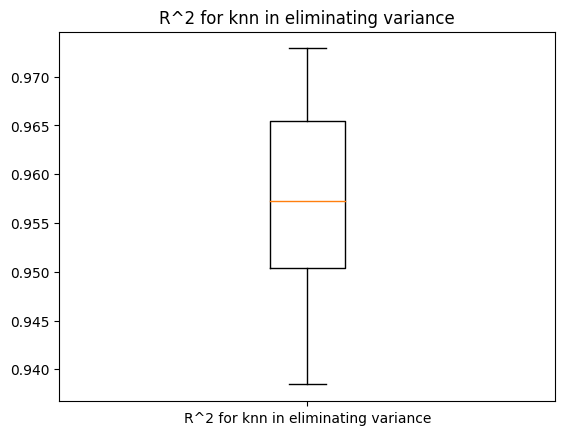

In [ ]:
box = np.array(r2knnv)

dict = {'R^2 for knn in eliminating variance' : box}
fig, ax = plt.subplots()


ax.boxplot(dict.values())
ax.set_xticklabels(dict.keys())
plt.title("R^2 for knn in eliminating variance")
plt.show()

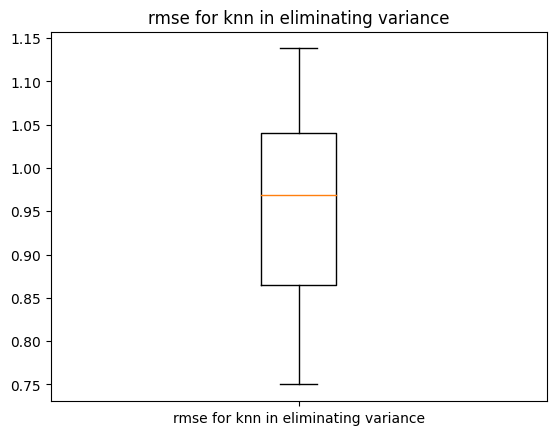

In [ ]:
box = np.array(rmseknnv)

dict = {'rmse for knn in eliminating variance' : box}
fig, ax = plt.subplots()

ax.boxplot(dict.values())
ax.set_xticklabels(dict.keys())
plt.title("rmse for knn in eliminating variance")
plt.show()

### low

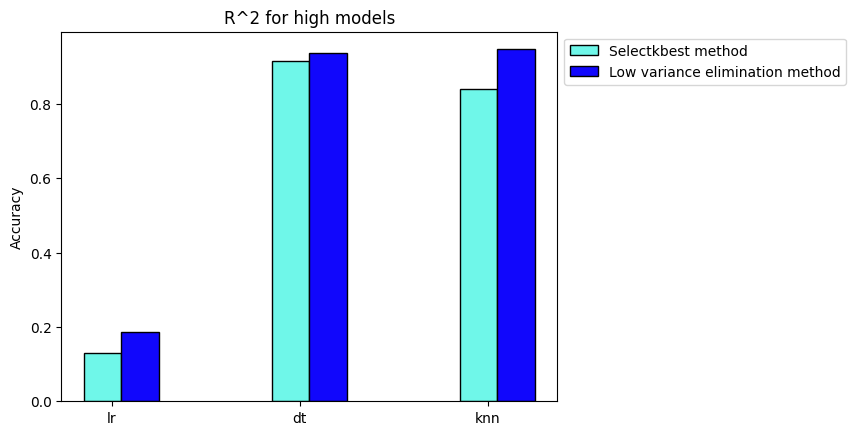

In [ ]:
models = ['lr' , 'dt' , 'knn']
list1h = [r2lrskbsumlow , r2dtskbsumlow , r2knnskbsumlow]
list2h = [r2lrvsumlow , r2dtvsumlow , r2knnvsumlow]
X_axis = np.arange(len(models))
plt.bar(X_axis + 0.15 , list1h  , color = '#6FF7E9' ,    width = 0.20 , edgecolor = 'black' , label = 'Selectkbest method')
plt.bar(X_axis + 0.35 , list2h , color = '#1107FC' , width = 0.20 , edgecolor = 'black' , label = 'Low variance elimination method')

plt.xticks(X_axis + 0.20, models)
plt.legend(bbox_to_anchor=(1 , 1))

plt.ylabel("Accuracy")
plt.title("R^2 for high models")
plt.show()

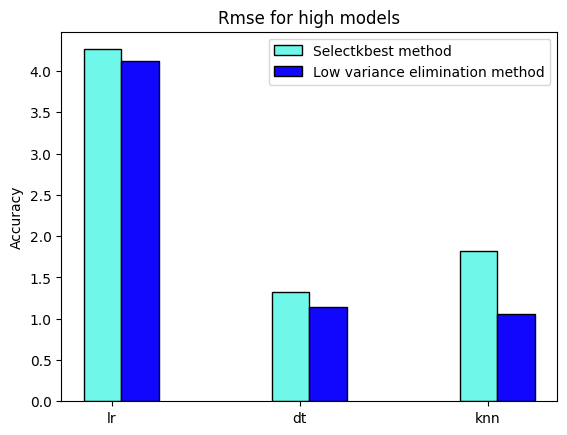

In [ ]:
models = ['lr' , 'dt' , 'knn']
list1h = [rmselrskbsumlow , rmsedtskbsumlow , rmseknnskbsumlow]
list2h = [rmselrvsumlow , rmsedtvsumlow , rmseknnvsumlow]
X_axis = np.arange(len(models))
plt.bar(X_axis + 0.15 , list1h  , color = '#6FF7E9' ,    width = 0.20 , edgecolor = 'black' , label = 'Selectkbest method')
plt.bar(X_axis + 0.35 , list2h , color = '#1107FC' , width = 0.20 , edgecolor = 'black' , label = 'Low variance elimination method')

plt.xticks(X_axis + 0.20, models)
plt.legend(bbox_to_anchor=(1 , 1))

plt.ylabel("Accuracy")
plt.title("Rmse for high models")
plt.show()

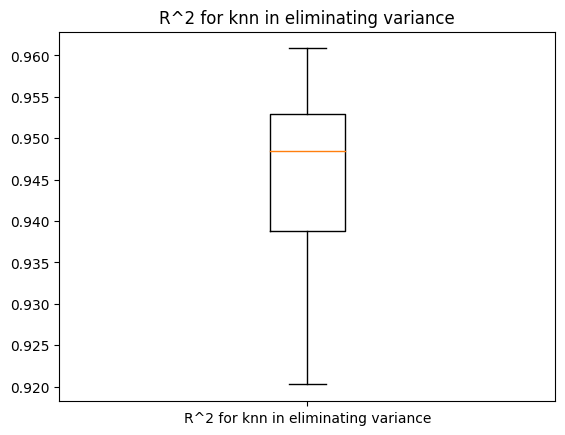

In [ ]:
box = np.array(r2knnvlow)

dict = {'R^2 for knn in eliminating variance' : box}
fig, ax = plt.subplots()


ax.boxplot(dict.values())
ax.set_xticklabels(dict.keys())
plt.title("R^2 for knn in eliminating variance")
plt.show()

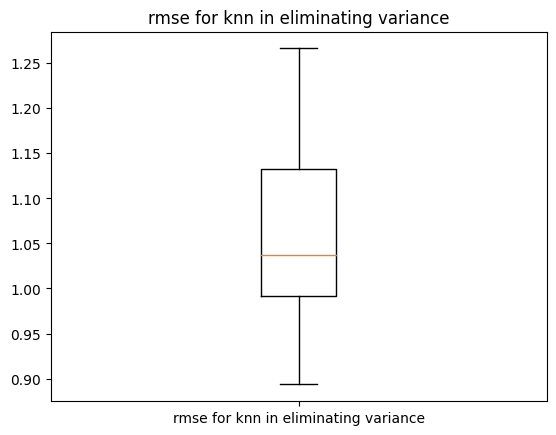

In [ ]:
box = np.array(rmseknnvlow)

dict = {'rmse for knn in eliminating variance' : box}
fig, ax = plt.subplots()

ax.boxplot(dict.values())
ax.set_xticklabels(dict.keys())
plt.title("rmse for knn in eliminating variance")
plt.show()